In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
pwd

'/ictstr01/groups/ml01/workspace/shrey.parikh/PDAC_Work_Dir/Final_Code_Git'

In [3]:
import os
os.chdir('../../PDAC_Work_Dir/PDAC_Final/Downstream/')

In [8]:
sc.set_figure_params(dpi=100)
pd.set_option('display.max_columns', None)

In [9]:
steele_atlas = sc.read_h5ad('../../Steele_Atlas_counts.h5ad')

In [10]:
subset = sc.pp.subsample(steele_atlas, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 14537.0, Mean: 0.11886571915387929
All values are integers: True


In [11]:
steele_atlas

AnnData object with n_obs × n_vars = 726107 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count', 'Study..Citation..PMID.', 'GSE.SRA..Study.', 'Name', 'If.metastatic..location', 'Clusters', 'Treatment', 'DiseaseState', 'TreatmentType'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

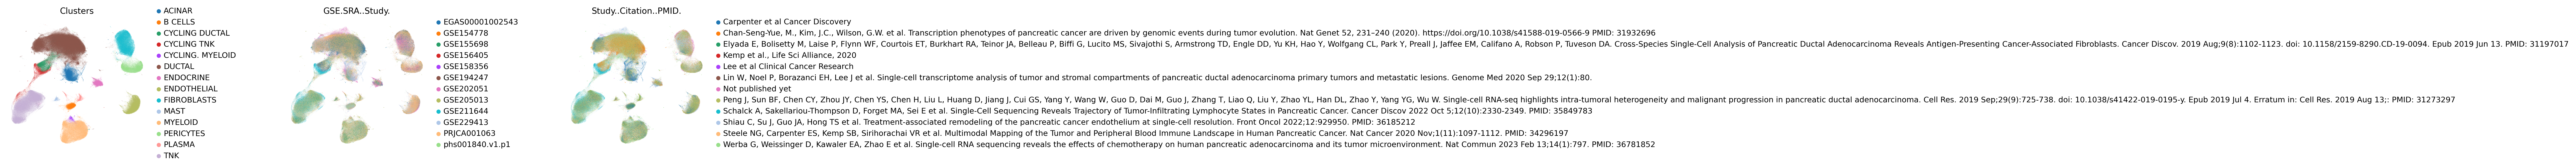

In [12]:
sc.pl.umap(steele_atlas, color=['Clusters', 'GSE.SRA..Study.', 'Study..Citation..PMID.'], frameon=False, wspace=0.75)

In [13]:
steele_atlas.obs = steele_atlas.obs.astype(str)

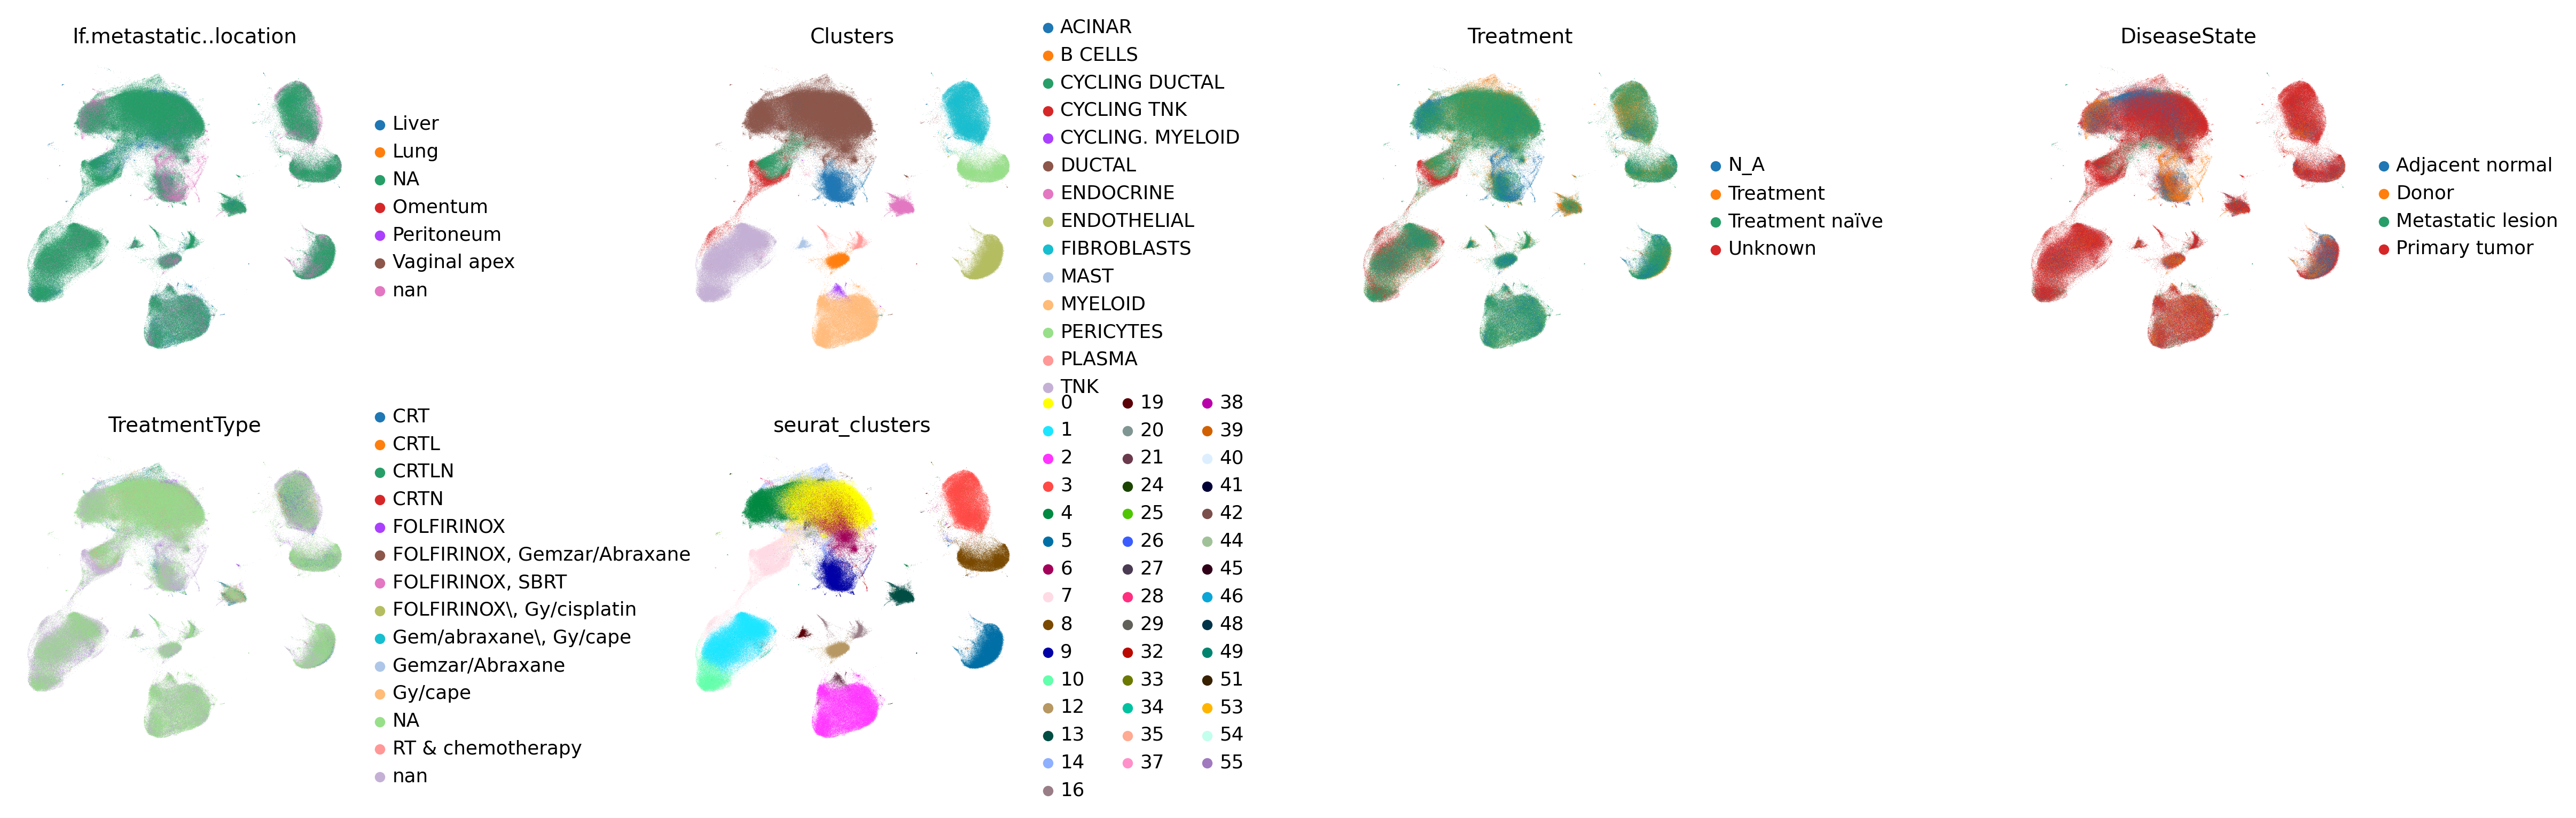

In [14]:
sc.pl.umap(steele_atlas, color=['If.metastatic..location', 'Clusters', 'Treatment', 'DiseaseState', 'TreatmentType', 'seurat_clusters'], frameon=False, wspace=0.75)

In [15]:
steele_atlas.obs.groupby(['If.metastatic..location', 'DiseaseState']).size().unstack()

/tmp/ipykernel_4181666/1858164979.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas.obs.groupby(['If.metastatic..location', 'DiseaseState']).size().unstack()


DiseaseState             Adjacent normal  Donor  Metastatic lesion  \
If.metastatic..location                                              
Liver                                  0      0              53145   
Lung                                   0      0               1225   
NA                                 74035      0                  0   
Omentum                                0      0                138   
Peritoneum                             0      0                459   
Vaginal apex                           0      0               1475   
nan                                    0  33309                  0   

DiseaseState             Primary tumor  
If.metastatic..location                 
Liver                                0  
Lung                                 0  
NA                              532699  
Omentum                              0  
Peritoneum                           0  
Vaginal apex                         0  
nan                              29622

In [16]:
steele_atlas.obs.rename(columns={'GSE.SRA..Study.': 'Dataset', 'Name': 'Donor_ID', 'DiseaseState':'Condition', 'If.metastatic..location': 'Location'}, inplace=True)

In [17]:
needed = ['EGAS00001002543', 'GSE158356', 'GSE194247', 'GSE211644', 'GSE229413', 'phs001840.v1.p1']

In [18]:
# steele_atlas.obs.drop('nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters'

In [19]:
steele_atlas.obs.groupby('Dataset').size()

/tmp/ipykernel_4181666/3148743956.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas.obs.groupby('Dataset').size()


Dataset
EGAS00001002543     76094
GSE154778           20364
GSE155698           23991
GSE156405           17809
GSE158356            2746
GSE194247           29622
GSE202051          147643
GSE205013          167366
GSE211644           40971
GSE229413           33309
PRJCA001063        147907
phs001840.v1.p1     18285
dtype: int64

In [20]:
steele_atlas_needed = steele_atlas[steele_atlas.obs['Dataset'].isin(needed)]

In [21]:
steele_atlas_needed.shape

(201027, 36601)

In [22]:
steele_atlas_needed.obs.groupby(['Dataset', 'Condition']).size().unstack()

/tmp/ipykernel_4181666/1229053749.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas_needed.obs.groupby(['Dataset', 'Condition']).size().unstack()


Condition        Adjacent normal  Donor  Metastatic lesion  Primary tumor
Dataset                                                                  
EGAS00001002543                0      0                  0          76094
GSE158356                      0      0               2746              0
GSE194247                      0      0                  0          29622
GSE211644                      0      0                  0          40971
GSE229413                      0  33309                  0              0
phs001840.v1.p1             4181      0                  0          14104

In [23]:
steele_atlas_needed.obs.groupby(['Dataset', 'Clusters']).size().unstack()

/tmp/ipykernel_4181666/2422205071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  steele_atlas_needed.obs.groupby(['Dataset', 'Clusters']).size().unstack()


Clusters         ACINAR  B CELLS  CYCLING DUCTAL  CYCLING TNK  \
Dataset                                                         
EGAS00001002543    1403     1520            4385           63   
GSE158356            67       77              66           21   
GSE194247           306       20             661            0   
GSE211644           305       35              57        11818   
GSE229413          8979     1459             114           48   
phs001840.v1.p1     215     1949              17           48   

Clusters         CYCLING. MYELOID  DUCTAL  ENDOCRINE  ENDOTHELIAL  \
Dataset                                                             
EGAS00001002543               144   47945       1642         2852   
GSE158356                       2     555         98           38   
GSE194247                       3   11280        164         2722   
GSE211644                     279     604        238           41   
GSE229413                     163    9223        336         3425   
phs001840.v1.p1                66    1163         47           82   

Clusters         FIBROBLASTS  MAST  MYELOID  PERICYTES  PLASMA    TNK  
Dataset                                                                
EGAS00001002543         5354   418     3671       2648     336   3713  
GSE158356                108    13     1341        100      63    197  
GSE194247              11567    15       31       2689       4    160  
GSE211644                  1    32      289         25      69  27178  
GSE229413               1551   144     4931        979      28   1929  
phs001840.v1.p1          648    68     7359        356     279   5988

In [24]:
import os
os.chdir('Extension')

In [42]:
for dataset in needed:
    dataset_name = dataset.replace('.','_') + '.h5ad'
    print(f'Saving: {dataset_name}')
    adata_temp = steele_atlas[steele_atlas.obs['Dataset'] == dataset].copy()
    subset = sc.pp.subsample(adata_temp, fraction=0.01, copy=True)
    X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
    print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
    # Check if all values are integers (raw count hint)
    is_integer = np.allclose(X, X.astype(int))
    print(f"All values are integers: {is_integer}")
    adata_temp.layers['raw'] = adata_temp.X.copy()
    sc.pp.normalize_total(adata_temp, target_sum=1e4)
    sc.pp.log1p(adata_temp)
    adata_temp.layers['log_norm'] = adata_temp.X.copy()
    adata_temp.write(dataset_name)
    print('_'*50)

Saving: EGAS00001002543.h5ad
Min: 0.0, Max: 5981.0, Mean: 0.12671752569314326
All values are integers: True
__________________________________________________
Saving: GSE158356.h5ad
Min: 0.0, Max: 942.0, Mean: 0.2155344875215917
All values are integers: True
__________________________________________________
Saving: GSE194247.h5ad
Min: 0.0, Max: 1225.0, Mean: 0.2092086724849491
All values are integers: True
__________________________________________________
Saving: GSE211644.h5ad
Min: 0.0, Max: 169.0, Mean: 0.07306005039877263
All values are integers: True
__________________________________________________
Saving: GSE229413.h5ad
Min: 0.0, Max: 23152.0, Mean: 0.39059091330887186
All values are integers: True
__________________________________________________
Saving: phs001840_v1_p1.h5ad
Min: 0.0, Max: 3500.0, Mean: 0.06377370341469683
All values are integers: True
__________________________________________________


In [48]:
subset = sc.pp.subsample(adata_temp, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 8.627984610343052, Mean: 0.04766361545984884
All values are integers: False


# Load Other Datasets

In [51]:
adata = sc.read_h5ad('../../Binned_Data/adata_scpoli_final_all_genes.h5ad')

In [62]:
adata

AnnData object with n_obs × n_vars = 827318 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersect

In [69]:
adata.obs.groupby('Dataset').size()

/tmp/ipykernel_2528150/316840971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Dataset').size()


Dataset
Caronni             71985
Ding               146983
Ding_snRNA-seq      58888
Lee                  8136
Lin                 14895
Peng                41411
Peng_Normal         14668
Hwang              186330
Schlesinger          5387
Simeone            200471
Steele              35928
Steele_Adj_Norm      6331
Zhang               35905
dtype: int64

# Zhang

In [ ]:
zhang = adata[adata.obs.Dataset.str.contains('Zhang')]

In [70]:
zhang.obs.ID_batch_covariate.unique().tolist()

['GSM5910789_Case3-YF_PDAC_Zhang_scRNA-seq',
 'GSM5910787_Case2-YF_PDAC_Zhang_scRNA-seq',
 'GSM5910784_Case1-YF_PDAC_Zhang_scRNA-seq']

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


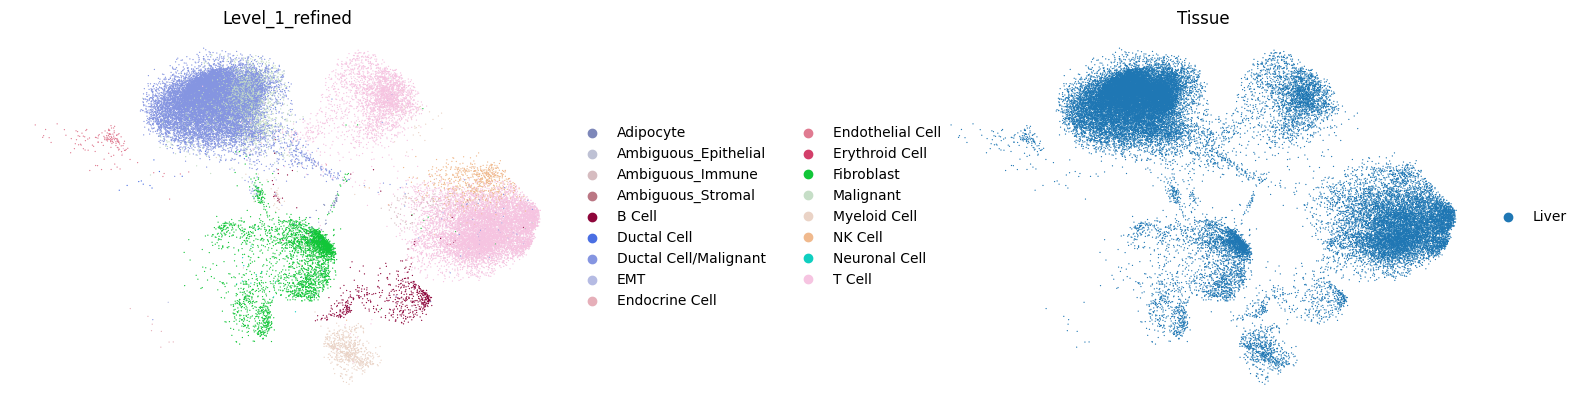

In [65]:
sc.pl.umap(zhang, color=['Level_1_refined', 'Tissue'], frameon=False, wspace=0.5)

## zhang all donors

In [34]:
zhang_all = sc.read_h5ad('/lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Zhang/Zhang_concat.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [35]:
zhang_loc = {'GSM5910784_Case1-YF_PDAC': 'Tumour', 
'GSM5910788_Case2-ZY_LM': 'Liver Metastatses',
'GSM5910785_Case1-ZY_LM':'Liver Metastatses', 
'GSM5910790_Case3-ZY_LM':'Liver Metastatses', 
'GSM5910789_Case3-YF_PDAC': 'Tumour', 
'GSM5910786_Case2-ZC_NPT': 'Adjacent Normal', 
'GSM5910791_Case4-ZY_LM': 'Liver Metastatses', 
'GSM5910787_Case2-YF_PDAC': 'Tumour', 
'GSM5910784_Case1-YF_PDAC': 'Tumour'}
zhang_all.obs['Location'] = zhang_all.obs.ID.map(zhang_loc)

In [36]:
zhang_all.obs.groupby('ID').size()

/tmp/ipykernel_4181666/1765156529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zhang_all.obs.groupby('ID').size()


ID
GSM5910784_Case1-YF_PDAC    19139
GSM5910785_Case1-ZY_LM      12030
GSM5910786_Case2-ZC_NPT      5924
GSM5910787_Case2-YF_PDAC    10556
GSM5910788_Case2-ZY_LM       7778
GSM5910789_Case3-YF_PDAC     8239
GSM5910790_Case3-ZY_LM       7663
GSM5910791_Case4-ZY_LM       1206
dtype: int64

In [37]:
subset = sc.pp.subsample(zhang_all, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0, Max: 3554, Mean: 0.3732607789109598
All values are integers: True


In [43]:
zhang_all.obs.head()

n_counts  log_counts  n_genes  mt_frac  \
barcode                                                      
AAACCCAAGTCTGTAC-1      3246    8.085179     1189      0.0   
AAACCCACAACAAAGT-1      3015    8.011355     1056      0.0   
AAACCCACAATAACCC-1      1061    6.966967      588      0.0   
AAACCCACACTCCGGA-1      2438    7.798933      798      0.0   
AAACCCAGTCGTACTA-1       828    6.719013      415      0.0   

                                        ID Dataset           Location  
barcode                                                                
AAACCCAAGTCTGTAC-1  GSM5910788_Case2-ZY_LM   Zhang  Liver Metastatses  
AAACCCACAACAAAGT-1  GSM5910788_Case2-ZY_LM   Zhang  Liver Metastatses  
AAACCCACAATAACCC-1  GSM5910788_Case2-ZY_LM   Zhang  Liver Metastatses  
AAACCCACACTCCGGA-1  GSM5910788_Case2-ZY_LM   Zhang  Liver Metastatses  
AAACCCAGTCGTACTA-1  GSM5910788_Case2-ZY_LM   Zhang  Liver Metastatses

In [44]:
zhang_all.layers['raw'] = zhang_all.X.copy()
sc.pp.normalize_total(zhang_all, target_sum=1e4)
sc.pp.log1p(zhang_all)
zhang_all.layers['log_norm'] = zhang_all.X.copy()
zhang_all.write('Zhang_GSE197177.h5ad')

In [47]:
zhang_all

AnnData object with n_obs × n_vars = 72535 × 21913
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'ID', 'Dataset', 'Location'
    uns: 'log1p'
    layers: 'raw', 'log_norm'

In [41]:
zhang_all.shape

(72535, 21913)

In [49]:
subset = sc.pp.subsample(zhang_all, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 8.598437086757505, Mean: 0.11186616600871953
All values are integers: False


# Lin MET

In [52]:
lin_metastasis = adata[adata.obs.Dataset.str.contains('Lin')]

In [53]:
lin_metastasis.obs.groupby('Tissue').size()

/tmp/ipykernel_4181666/4203594212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lin_metastasis.obs.groupby('Tissue').size()


Tissue
Liver       6876
Pancreas    8019
dtype: int64

In [54]:
lin_metastasis = lin_metastasis[lin_metastasis.obs.Tissue == 'Liver']

In [55]:
lin_metastasis.shape

(6876, 39024)

In [56]:
lin_metastasis.obs.Unique_ID.unique()

['GSM4679546', 'GSM4679547', 'GSM4679545', 'GSM4679544', 'GSM4679542', 'GSM4679543']
Categories (6, object): ['GSM4679542', 'GSM4679543', 'GSM4679544', 'GSM4679545', 'GSM4679546', 'GSM4679547']

In [57]:
subset = sc.pp.subsample(lin_metastasis, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 2671.0, Mean: 0.19643567759207003
All values are integers: True


In [58]:
lin_metastasis.layers['raw'] = lin_metastasis.X.copy()
sc.pp.normalize_total(lin_metastasis, target_sum=1e4)
sc.pp.log1p(lin_metastasis)
lin_metastasis.layers['log_norm'] = lin_metastasis.X.copy()

/tmp/ipykernel_4181666/2069782633.py:1: ImplicitModificationWarning: Setting element `.layers['raw']` of view, initializing view as actual.
  lin_metastasis.layers['raw'] = lin_metastasis.X.copy()


In [59]:
subset = sc.pp.subsample(lin_metastasis, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 8.244660426453157, Mean: 0.0689123288188897
All values are integers: False


In [60]:
lin_metastasis.write('Lin_MET_GSE154778.h5ad')

In [72]:
lin_metastasis

AnnData object with n_obs × n_vars = 6876 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersectio

# Simeone MET

In [61]:
simeone_metastasis = adata[adata.obs.Dataset.str.contains('Simeon')]

In [62]:
simeone_metastasis.obs.groupby('Tissue').size()

/tmp/ipykernel_4181666/3853230344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  simeone_metastasis.obs.groupby('Tissue').size()


Tissue
Liver        58483
Pancreas    141988
dtype: int64

In [63]:
simeone_metastasis = simeone_metastasis[simeone_metastasis.obs.Tissue == 'Liver']

In [64]:
simeone_metastasis.shape

(58483, 39024)

In [65]:
subset = sc.pp.subsample(simeone_metastasis, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 8524.0, Mean: 0.22394666155565665
All values are integers: True


In [66]:
simeone_metastasis.layers['raw'] = simeone_metastasis.X.copy()
sc.pp.normalize_total(simeone_metastasis, target_sum=1e4)
sc.pp.log1p(simeone_metastasis)
simeone_metastasis.layers['log_norm'] = simeone_metastasis.X.copy()

/tmp/ipykernel_4181666/82594927.py:1: ImplicitModificationWarning: Setting element `.layers['raw']` of view, initializing view as actual.
  simeone_metastasis.layers['raw'] = simeone_metastasis.X.copy()


In [67]:
subset = sc.pp.subsample(simeone_metastasis, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 8.588845192273562, Mean: 0.07165514302034137
All values are integers: False


In [68]:
simeone_metastasis.write('Simeone_MET_GSE205013.h5ad')

In [73]:
simeone_metastasis

AnnData object with n_obs × n_vars = 58483 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersecti

In [70]:
simeone_metastasis.shape[0] + lin_metastasis.shape[0] + zhang_all.shape[0] + steele_atlas_needed.shape[0] 
print(simeone_metastasis.shape[0] + lin_metastasis.shape[0] + zhang_all.shape[0] + steele_atlas_needed.shape[0] + 726054)

1064975


In [69]:
pwd

'/ictstr01/groups/ml01/workspace/shrey.parikh/PDAC_Work_Dir/PDAC_Final/Downstream/Extension'

In [6]:
simeone_metastasis = sc.read_h5ad('Extension/Simeone_MET_GSE205013.h5ad')

In [71]:
simeone_metastasis.obs.head()

Barcode  Dataset  \
Dataset_Barcode                                             
Simeone_AAACCCAAGGAGATAG-1-0  AAACCCAAGGAGATAG-1  Simeone   
Simeone_AAACCCAAGTTGCGAG-1-0  AAACCCAAGTTGCGAG-1  Simeone   
Simeone_AAACCCACACGATAGG-1-0  AAACCCACACGATAGG-1  Simeone   
Simeone_AAACCCACACGTTCGG-1-0  AAACCCACACGTTCGG-1  Simeone   
Simeone_AAACCCAGTCGCATGC-1-0  AAACCCAGTCGCATGC-1  Simeone   

                                 ID_batch_covariate       Unique_ID  \
Dataset_Barcode                                                       
Simeone_AAACCCAAGGAGATAG-1-0  P17_Simeone_scRNA-seq  GSM6204125_P17   
Simeone_AAACCCAAGTTGCGAG-1-0  P17_Simeone_scRNA-seq  GSM6204125_P17   
Simeone_AAACCCACACGATAGG-1-0  P17_Simeone_scRNA-seq  GSM6204125_P17   
Simeone_AAACCCACACGTTCGG-1-0  P17_Simeone_scRNA-seq  GSM6204125_P17   
Simeone_AAACCCAGTCGCATGC-1-0  P17_Simeone_scRNA-seq  GSM6204125_P17   

                             Technology  n_genes  n_counts  log_counts  \
Dataset_Barcode                                                          
Simeone_AAACCCAAGGAGATAG-1-0  scRNA-seq     2531   11439.0    9.344784   
Simeone_AAACCCAAGTTGCGAG-1-0  scRNA-seq     3208   12015.0    9.393911   
Simeone_AAACCCACACGATAGG-1-0  scRNA-seq     4702   17998.0    9.798016   
Simeone_AAACCCACACGTTCGG-1-0  scRNA-seq     1065    2221.0    7.705713   
Simeone_AAACCCAGTCGCATGC-1-0  scRNA-seq     4547   24846.0   10.120452   

                               mt_frac  n_genes_by_counts  \
Dataset_Barcode                                             
Simeone_AAACCCAAGGAGATAG-1-0  0.011627               2531   
Simeone_AAACCCAAGTTGCGAG-1-0  0.035539               3208   
Simeone_AAACCCACACGATAGG-1-0  0.057840               4702   
Simeone_AAACCCACACGTTCGG-1-0  0.049077               1065   
Simeone_AAACCCAGTCGCATGC-1-0  0.037551               4547   

                              log1p_n_genes_by_counts  total_counts  \
Dataset_Barcode                                                       
Simeone_AAACCCAAGGAGATAG-1-0                 7.836765       11429.0   
Simeone_AAACCCAAGTTGCGAG-1-0                 8.073715       12008.0   
Simeone_AAACCCACACGATAGG-1-0                 8.455956       17992.0   
Simeone_AAACCCACACGTTCGG-1-0                 6.971669        2217.0   
Simeone_AAACCCAGTCGCATGC-1-0                 8.422443       24835.0   

                              log1p_total_counts  total_counts_mito  \
Dataset_Barcode                                                       
Simeone_AAACCCAAGGAGATAG-1-0            9.343997              133.0   
Simeone_AAACCCAAGTTGCGAG-1-0            9.393412              427.0   
Simeone_AAACCCACACGATAGG-1-0            9.797738             1041.0   
Simeone_AAACCCACACGTTCGG-1-0            7.704361              109.0   
Simeone_AAACCCAGTCGCATGC-1-0           10.120049              933.0   

                              log1p_total_counts_mito  pct_counts_mito leiden  \
Dataset_Barcode                                                                 
Simeone_AAACCCAAGGAGATAG-1-0                 4.897840         1.163706      1   
Simeone_AAACCCAAGTTGCGAG-1-0                 6.059123         3.555963      3   
Simeone_AAACCCACACGATAGG-1-0                 6.948897         5.785905      1   
Simeone_AAACCCACACGTTCGG-1-0                 4.700480         4.916554     11   
Simeone_AAACCCAGTCGCATGC-1-0                 6.839476         3.756795      1   

                             batch leiden_0.2 leiden_0.2_annotation  \
Dataset_Barcode                                                       
Simeone_AAACCCAAGGAGATAG-1-0     0          1                Immune   
Simeone_AAACCCAAGTTGCGAG-1-0     0          2            Epithelial   
Simeone_AAACCCACACGATAGG-1-0     0          1                Immune   
Simeone_AAACCCACACGTTCGG-1-0     0          0               Stromal   
Simeone_AAACCCAGTCGCATGC-1-0     0          1                Immune   

                             leiden_subcluster     level0_leiden_subcluster  \
Dataset_Barcode            

# Lee MET

In [74]:
lee_all = sc.read_h5ad('/lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lee/Lee_concat.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [75]:
lee_all_met = lee_all[lee_all.obs.ID.isin(['LiM_filtered_feature_bc_matrix',  'VM_filtered_feature_bc_matrix', 'LuM_filtered_feature_bc_matrix'])]

In [76]:
lee_all_met.obs.groupby('ID').size()

/tmp/ipykernel_4181666/3645665652.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lee_all_met.obs.groupby('ID').size()


ID
LiM_filtered_feature_bc_matrix    10013
LuM_filtered_feature_bc_matrix     2899
VM_filtered_feature_bc_matrix      1527
dtype: int64

In [77]:
subset = sc.pp.subsample(lee_all_met, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0, Max: 1795, Mean: 0.38597866095385114
All values are integers: True


In [78]:
lee_all_met.obs['Location'] = lee_all_met.obs.ID.map({'LiM_filtered_feature_bc_matrix': 'Liver',  
                                                      'VM_filtered_feature_bc_matrix': 'Vaginal Apex', 
                                                      'LuM_filtered_feature_bc_matrix': 'Lung'})

/tmp/ipykernel_4181666/1425428342.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  lee_all_met.obs['Location'] = lee_all_met.obs.ID.map({'LiM_filtered_feature_bc_matrix': 'Liver',
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [79]:
lee_all_met.obs.groupby(['Location']).size()

/tmp/ipykernel_4181666/438034551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lee_all_met.obs.groupby(['Location']).size()


Location
Liver           10013
Lung             2899
Vaginal Apex     1527
dtype: int64

In [80]:
lee_all_met.layers['raw'] = lee_all_met.X.copy()
sc.pp.normalize_total(lee_all_met, target_sum=1e4)
sc.pp.log1p(lee_all_met)
lee_all_met.layers['log_norm'] = lee_all_met.X.copy()

In [81]:
subset = sc.pp.subsample(lee_all_met, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 7.753016584239393, Mean: 0.12019101954897296
All values are integers: False


In [82]:
lee_all_met

AnnData object with n_obs × n_vars = 14439 × 21161
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'ID', 'Dataset', 'Location'
    uns: 'log1p'
    layers: 'raw', 'log_norm'

In [84]:
lee_all_met.write('Lee_MET_GSE156405.h5ad')

# Reload all datasets and concat

In [4]:
import os
os.chdir('Extension')

In [5]:
for file in os.listdir():
    print(file.split('.')[0])

GSE211644
Simeone_MET_GSE205013
GSE158356
GSE194247
GSE212966
GSE229413
Lee_MET_GSE156405
Zhang_GSE197177
Lin_MET_GSE154778
phs001840_v1_p1
EGAS00001002543


In [6]:
adatas ={}
for file in os.listdir():
    if 'Extension_Datasets_Combined' in file:
        continue
    print(f'Loading: {file}')
    if 'h5ad' in file:
        adatas[file] = sc.read_h5ad(file)
        adatas[file].obs['Dataset'] = file.split('.')[0]

Loading: GSE211644.h5ad
Loading: Simeone_MET_GSE205013.h5ad
Loading: GSE158356.h5ad
Loading: GSE194247.h5ad
Loading: GSE212966
Loading: GSE229413.h5ad
Loading: Lee_MET_GSE156405.h5ad


/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Loading: Zhang_GSE197177.h5ad


/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Loading: Lin_MET_GSE154778.h5ad
Loading: phs001840_v1_p1.h5ad
Loading: EGAS00001002543.h5ad


In [7]:
for key,adata in adatas.items():
    print('-'*50)
    print(f'Columns in {key}: {adata.obs.columns}')
    print(f'Layers: {adata.layers}')
    print('-'*50)

--------------------------------------------------
Columns in GSE211644.h5ad: Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count',
       'Study..Citation..PMID.', 'Dataset', 'Donor_ID', 'Location', 'Clusters',
       'Treatment', 'Condition', 'TreatmentType'],
      dtype='object')
Layers: Layers with keys: log_norm, raw
--------------------------------------------------
--------------------------------------------------
Columns in Simeone_MET_GSE205013.h5ad: Index(['Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology',
       'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation',
       'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5',
       'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant',
 

In [8]:
adata_combined = sc.concat(adatas.values(), label='batch', keys=adatas.keys(), join='outer')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
adata_combined

AnnData object with n_obs × n_vars = 353360 × 44292
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count', 'Study..Citation..PMID.', 'Dataset', 'Donor_ID', 'Location', 'Clusters', 'Treatment', 'Condition', 'TreatmentType', 'Barcode', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'ID'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 

In [11]:
for dataset in adata_combined.obs.Dataset.unique():
    print(f'{dataset}')
    adata_temp = adata_combined[adata_combined.obs.Dataset == dataset]
    subset = sc.pp.subsample(adata_temp, fraction=0.01, copy=True)
    X = subset.layers['raw'].toarray() if hasattr(subset.X, "toarray") else subset.X
    
    print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")
    
    # Check if all values are integers (raw count hint)
    is_integer = np.allclose(X, X.astype(int))
    print(f"All values are integers: {is_integer}")
    print('-'*50)

GSE211644
Min: 0.0, Max: 169.0, Mean: 0.060373677066862565
All values are integers: True
--------------------------------------------------
Simeone_MET_GSE205013
Min: 0.0, Max: 8524.0, Mean: 0.19731090310999605
All values are integers: True
--------------------------------------------------
GSE158356
Min: 0.0, Max: 942.0, Mean: 0.1781084118526546
All values are integers: True
--------------------------------------------------
GSE194247
Min: 0.0, Max: 1225.0, Mean: 0.17288103092255083
All values are integers: True
--------------------------------------------------
GSE229413
Min: 0.0, Max: 23152.0, Mean: 0.32276749792328224
All values are integers: True
--------------------------------------------------
Lee_MET_GSE156405
Min: 0.0, Max: 1795.0, Mean: 0.1844056363326209
All values are integers: True
--------------------------------------------------
Zhang_GSE197177
Min: 0.0, Max: 3554.0, Mean: 0.18466683482967267
All values are integers: True
-----------------------------------------------

In [12]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('Liver Metastatses', 'Liver')

/tmp/ipykernel_589735/1776316749.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('Liver Metastatses', 'Liver')


In [13]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('nan', 'NA')

/tmp/ipykernel_589735/251772292.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('nan', 'NA')


In [14]:
adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()

/tmp/ipykernel_589735/3810818464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()


Location               Adjacent Normal  Liver  Lung     NA  Omentum  Tumour  \
Dataset                                                                       
EGAS00001002543                      0      0     0  76094        0       0   
GSE158356                            0   2608     0      0      138       0   
GSE194247                            0      0     0  29622        0       0   
GSE211644                            0      0     0  40971        0       0   
GSE229413                            0      0     0  33309        0       0   
Lee_MET_GSE156405                    0  10013  2899      0        0       0   
Lin_MET_GSE154778                    0      0     0      0        0       0   
Simeone_MET_GSE205013                0      0     0      0        0       0   
Zhang_GSE197177                   5924  28677     0      0        0   37934   
phs001840_v1_p1                      0      0     0  18285        0       0   

Location               Vaginal Apex  
Dataset                              
EGAS00001002543                   0  
GSE158356                         0  
GSE194247                         0  
GSE211644                         0  
GSE229413                         0  
Lee_MET_GSE156405              1527  
Lin_MET_GSE154778                 0  
Simeone_MET_GSE205013             0  
Zhang_GSE197177                   0  
phs001840_v1_p1                   0

In [15]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Adjacent normal', 'Healthy')

/tmp/ipykernel_589735/2629670990.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Adjacent normal', 'Healthy')


In [16]:
adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()

/tmp/ipykernel_589735/943054544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()


Condition              Healthy  Donor  Metastatic lesion  Primary tumor
Dataset                                                                
EGAS00001002543              0      0                  0          76094
GSE158356                    0      0               2746              0
GSE194247                    0      0                  0          29622
GSE211644                    0      0                  0          40971
GSE229413                    0  33309                  0              0
Lee_MET_GSE156405            0      0                  0              0
Lin_MET_GSE154778            0      0                  0              0
Simeone_MET_GSE205013        0      0                  0              0
Zhang_GSE197177              0      0                  0              0
phs001840_v1_p1           4181      0                  0          14104

In [ ]:
# location: pancreas,

# Fix  GSE229413

In [17]:
mask = adata_combined.obs.Dataset == 'GSE229413' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Healthy'

In [18]:
adata_combined.obs.Condition = adata_combined.obs.Condition.astype(str)

# Fix  Lin, Simeone

In [19]:
mask = adata_combined.obs.Dataset.str.contains('Lin') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Metastatic Lesion'
mask = adata_combined.obs.Dataset.str.contains('Simeone') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Metastatic Lesion'
mask = adata_combined.obs.Dataset.str.contains('Lee') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = 'Metastatic Lesion'

In [20]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Metastatic lesion', 'Metastatic Lesion')

In [21]:
adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()

Condition              Healthy  Metastatic Lesion  Primary tumor      nan
Dataset                                                                  
EGAS00001002543            NaN                NaN        76094.0      NaN
GSE158356                  NaN             2746.0            NaN      NaN
GSE194247                  NaN                NaN        29622.0      NaN
GSE211644                  NaN                NaN        40971.0      NaN
GSE229413              33309.0                NaN            NaN      NaN
Lee_MET_GSE156405          NaN            14439.0            NaN      NaN
Lin_MET_GSE154778          NaN             6876.0            NaN      NaN
Simeone_MET_GSE205013      NaN            58483.0            NaN      NaN
Zhang_GSE197177            NaN                NaN            NaN  72535.0
phs001840_v1_p1         4181.0                NaN        14104.0      NaN

In [22]:
mask = adata_combined.obs.Dataset.str.contains('Zhang') #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Condition'] = adata_combined.obs.loc[mask, 'Location']

In [23]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Tumour', 'Primary Tumor')
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Liver Metastatses', 'Metastatic Lesion')
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Adjacent Normal', 'Healhty')

In [24]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Healhty', 'Healthy')
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Primary tumor', 'Primary Tumor')

In [25]:
adata_combined.obs.Condition = adata_combined.obs.Condition.replace('Liver', 'Metastatic Lesion')

In [26]:
adata_combined.obs.groupby(['Dataset', 'Condition']).size().unstack()

Condition              Healthy  Metastatic Lesion  Primary Tumor
Dataset                                                         
EGAS00001002543            NaN                NaN        76094.0
GSE158356                  NaN             2746.0            NaN
GSE194247                  NaN                NaN        29622.0
GSE211644                  NaN                NaN        40971.0
GSE229413              33309.0                NaN            NaN
Lee_MET_GSE156405          NaN            14439.0            NaN
Lin_MET_GSE154778          NaN             6876.0            NaN
Simeone_MET_GSE205013      NaN            58483.0            NaN
Zhang_GSE197177         5924.0            28677.0        37934.0
phs001840_v1_p1         4181.0                NaN        14104.0

In [27]:
adata_combined.obs.groupby(['Condition']).size()

Condition
Healthy               43414
Metastatic Lesion    111221
Primary Tumor        198725
dtype: int64

In [28]:
adata_combined.obs = adata_combined.obs.astype(str)

In [29]:
adata_combined.obs.replace("nan", np.nan, inplace=True)

/tmp/ipykernel_589735/4178607326.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata_combined.obs.replace("nan", np.nan, inplace=True)


In [30]:
adata_combined.obs['Atlas_Extension_CellType'] = adata_combined.obs['Level_1_refined'].fillna(adata_combined.obs['Clusters'])

In [31]:
adata_combined.obs.columns

Index(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count',
       'Study..Citation..PMID.', 'Dataset', 'Donor_ID', 'Location', 'Clusters',
       'Treatment', 'Condition', 'TreatmentType', 'Barcode',
       'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts',
       'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch',
       'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster',
       'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts',
       'outlier', 'infercnv_score_malignant',
       'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status',
       'Level_0', 'Level_1', 'Level_1_refined', 'MALAT1_lognorm',
       'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age',
       'Sex', 'Diabetes', 'ID', 'Atlas_Extension_CellType'],
      dtype

In [32]:
adata_combined.obs.drop(['Level_1', 'Level_1_refined', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Count',
       'Study..Citation..PMID.','Clusters','n_genes', 'n_counts',
       'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch',
       'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster',
       'level0_leiden_subcluster', 'leiden_0.5','Level_0'], inplace=True, axis=1)

In [33]:
adata_combined.obs.head()

Dataset     Donor_ID Location        Treatment  \
AAACCTGAGCTCCTTC-1_135  GSE211644  SRR18025515       NA  Treatment naïve   
AAACGGGGTGCCTGCA-1_135  GSE211644  SRR18025515       NA  Treatment naïve   
AAAGATGGTGAAATCA-1_135  GSE211644  SRR18025515       NA  Treatment naïve   
AAAGATGTCCACGTGG-1_135  GSE211644  SRR18025515       NA  Treatment naïve   
AAAGCAAAGAATAGGG-1_135  GSE211644  SRR18025515       NA  Treatment naïve   

                            Condition TreatmentType Barcode  \
AAACCTGAGCTCCTTC-1_135  Primary Tumor            NA     NaN   
AAACGGGGTGCCTGCA-1_135  Primary Tumor            NA     NaN   
AAAGATGGTGAAATCA-1_135  Primary Tumor            NA     NaN   
AAAGATGTCCACGTGG-1_135  Primary Tumor            NA     NaN   
AAAGCAAAGAATAGGG-1_135  Primary Tumor            NA     NaN   

                       ID_batch_covariate Unique_ID Technology  ...  \
AAACCTGAGCTCCTTC-1_135                NaN       NaN        NaN  ...   
AAACGGGGTGCCTGCA-1_135                NaN       NaN        NaN  ...   
AAAGATGGTGAAATCA-1_135                NaN       NaN        NaN  ...   
AAAGATGTCCACGTGG-1_135                NaN       NaN        NaN  ...   
AAAGCAAAGAATAGGG-1_135                NaN       NaN        NaN  ...   

                       MALAT1_lognorm empty_droplet ID_harmonised  \
AAACCTGAGCTCCTTC-1_135            NaN          <NA>           NaN   
AAACGGGGTGCCTGCA-1_135            NaN          <NA>           NaN   
AAAGATGGTGAAATCA-1_135            NaN          <NA>           NaN   
AAAGATGTCCACGTGG-1_135            NaN          <NA>           NaN   
AAAGCAAAGAATAGGG-1_135            NaN          <NA>           NaN   

                       Dataset_unique Tissue  Age  Sex Diabetes   ID  \
AAACCTGAGCTCCTTC-1_135            NaN    NaN  NaN  NaN      NaN  NaN   
AAACGGGGTGCCTGCA-1_135            NaN    NaN  NaN  NaN      NaN  NaN   
AAAGATGGTGAAATCA-1_135            NaN    NaN  NaN  NaN      NaN  NaN   
AAAGATGTCCACGTGG-1_135            NaN    NaN  NaN  NaN      NaN  NaN   
AAAGCAAAGAATAGGG-1_135            NaN    NaN  NaN  NaN      NaN  NaN   

                       Atlas_Extension_CellType  
AAACCTGAGCTCCTTC-1_135                      TNK  
AAACGGGGTGCCTGCA-1_135                      TNK  
AAAGATGGTGAAATCA-1_135                      TNK  
AAAGATGTCCACGTGG-1_135                      TNK  
AAAGCAAAGAATAGGG-1_135                      TNK  

[5 rows x 26 columns]

# Fix Location

In [34]:
adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()

Location           Adjacent Normal    Liver    Lung       NA  Omentum  \
Dataset                                                                 
EGAS00001002543                NaN      NaN     NaN  76094.0      NaN   
GSE158356                      NaN   2608.0     NaN      NaN    138.0   
GSE194247                      NaN      NaN     NaN  29622.0      NaN   
GSE211644                      NaN      NaN     NaN  40971.0      NaN   
GSE229413                      NaN      NaN     NaN  33309.0      NaN   
Lee_MET_GSE156405              NaN  10013.0  2899.0      NaN      NaN   
Zhang_GSE197177             5924.0  28677.0     NaN      NaN      NaN   
phs001840_v1_p1                NaN      NaN     NaN  18285.0      NaN   

Location            Tumour  Vaginal Apex  
Dataset                                   
EGAS00001002543        NaN           NaN  
GSE158356              NaN           NaN  
GSE194247              NaN           NaN  
GSE211644              NaN           NaN  
GSE229413              NaN           NaN  
Lee_MET_GSE156405      NaN        1527.0  
Zhang_GSE197177    37934.0           NaN  
phs001840_v1_p1        NaN           NaN

In [35]:
mask = adata_combined.obs.Dataset == 'GSE229413' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [36]:
mask = adata_combined.obs.Dataset == 'GSE194247' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [37]:
mask = adata_combined.obs.Dataset == 'GSE211644' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [38]:
mask = adata_combined.obs.Dataset == 'phs001840.v1.p1' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [39]:
mask = adata_combined.obs.Dataset == 'EGAS00001002543' #.obs.Donor_ID.unique().tolist()
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [40]:
mask = (adata_combined.obs.Dataset == 'Zhang') & (adata_combined.obs.Location == 'Tumour')
adata_combined.obs.loc[mask, 'Location'] = 'Pancreas'

In [41]:
# Convert to categorical if it's not already
adata_combined.obs['Location'] = adata_combined.obs['Location'].astype('category')
# Now remove unwanted category
adata_combined.obs['Location'] = adata_combined.obs['Location'].cat.remove_categories(['Tumour'])

In [42]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('Adjacent Normal', 'Pancreas')

/tmp/ipykernel_589735/2436688717.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('Adjacent Normal', 'Pancreas')


In [43]:
adata_combined.obs.Location = adata_combined.obs.Location.replace('NA', 'Pancreas')

/tmp/ipykernel_589735/3395616900.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_combined.obs.Location = adata_combined.obs.Location.replace('NA', 'Pancreas')


In [44]:
adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()

/tmp/ipykernel_589735/3810818464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Dataset', 'Location']).size().unstack()


Location               Liver  Lung  Omentum  Pancreas  Vaginal Apex
Dataset                                                            
EGAS00001002543            0     0        0     76094             0
GSE158356               2608     0      138         0             0
GSE194247                  0     0        0     29622             0
GSE211644                  0     0        0     40971             0
GSE229413                  0     0        0     33309             0
Lee_MET_GSE156405      10013  2899        0         0          1527
Lin_MET_GSE154778          0     0        0         0             0
Simeone_MET_GSE205013      0     0        0         0             0
Zhang_GSE197177        28677     0        0      5924             0
phs001840_v1_p1            0     0        0     18285             0

In [45]:
adata_combined.obs.groupby(['Location']).size()

/tmp/ipykernel_589735/3596899262.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_combined.obs.groupby(['Location']).size()


Location
Liver            41298
Lung              2899
Omentum            138
Pancreas        204205
Vaginal Apex      1527
dtype: int64

In [47]:
adata_combined.X = adata_combined.layers['raw'].copy()

In [48]:
subset = sc.pp.subsample(adata_combined, fraction=0.01, copy=True)
X = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X

print(f"Min: {X.min()}, Max: {X.max()}, Mean: {X.mean()}")

# Check if all values are integers (raw count hint)
is_integer = np.allclose(X, X.astype(int))
print(f"All values are integers: {is_integer}")

Min: 0.0, Max: 33393.0, Mean: 0.16203851500485328
All values are integers: True


In [49]:
adata_combined.write('Extension_Datasets_Combined.h5ad')